In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import os
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

from rdkit.Chem import PandasTools



In [2]:
os.chdir('c:\\Users\\gabi1\\git\\ACTC_MD_ML\\data\\generated')
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\data\\generated'

In [3]:
polymerset = pd.read_csv('Polymer_SMILES.csv')
#polymerset = pd.DataFrame(polymerset)
polymerset.head()

,polymers_names,polymers_smiles
0,ar103,CC1CC2CCC3=CC=C(C=C3)C(CC(CC(C)C4=CC=C1C=C4)C5...
1,ar204,CC1CC2(C)CC(C)(CC(C)(CC(C)(CC(C)(C)C(=O)OCC[N+...
2,cr61,CC1CC2CCC3=CC=C(C=C3)C(CC(CCC4=CC=C1C=C4)C5=CC...
3,nafion,O=[S](=O)([O-])C(F)(F)C(F)(F)OC(F)(C(F)(F)F)C(...
4,PVAS_BCE,CC(O)CC(O)CC(O)CC(CC(CC(C)O[S]([O-])(=O)=O)O[S...


In [5]:
#This creates a new column called structure and it should show the structure of each polymer
PandasTools.AddMoleculeColumnToFrame(polymerset,'polymers_smiles', 'Structure')
polymerset.head()

,polymers_names,polymers_smiles,Structure
0,ar103,CC1CC2CCC3=CC=C(C=C3)C(CC(CC(C)C4=CC=C1C=C4)C5...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
1,ar204,CC1CC2(C)CC(C)(CC(C)(CC(C)(CC(C)(C)C(=O)OCC[N+...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
2,cr61,CC1CC2CCC3=CC=C(C=C3)C(CC(CCC4=CC=C1C=C4)C5=CC...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
3,nafion,O=[S](=O)([O-])C(F)(F)C(F)(F)OC(F)(C(F)(F)F)C(...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
4,PVAS_BCE,CC(O)CC(O)CC(O)CC(CC(CC(C)O[S]([O-])(=O)=O)O[S...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...


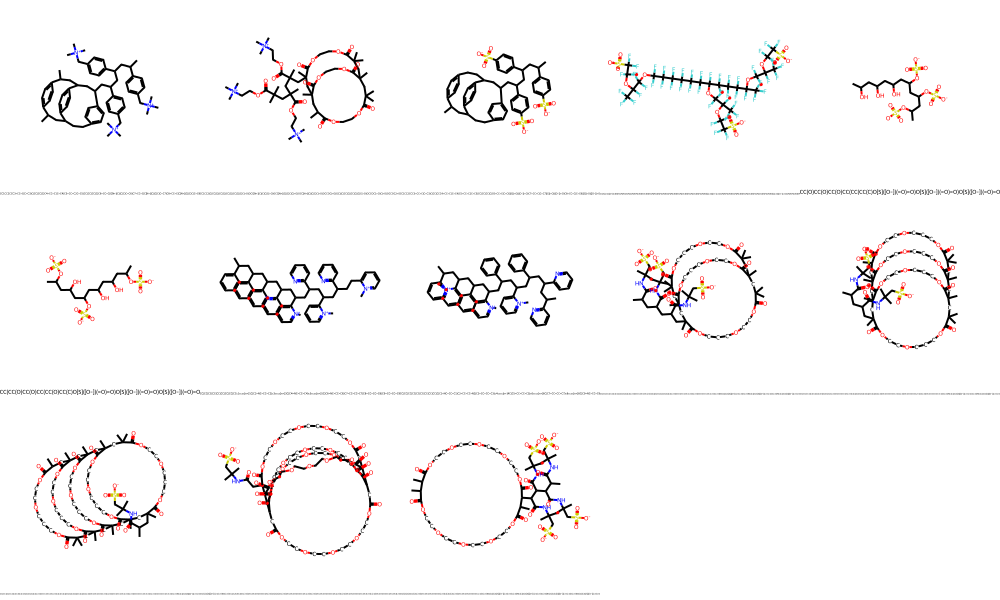

In [6]:
Draw.MolsToGridImage([x for x in polymerset["Structure"]][:15], maxMols=16, 
                     legends=[str(x) for x in polymerset.polymers_smiles], subImgSize=(200,200), molsPerRow=5)

## Morgan finger print

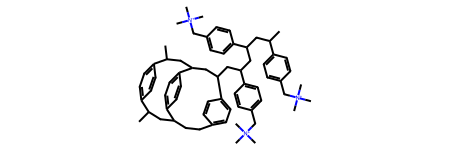

In [7]:
polymerset.Structure[0]

In [8]:
#onbits is a library
onbits = {}
# this is an example of how to create the fingerpritn of the first molecule and be saved in onbits
mf = AllChem.GetMorganFingerprintAsBitVect(polymerset.Structure[0], 2, nBits=512, bitInfo=onbits)
print(np.array(mf))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [9]:
#this part I want to see what molecules are on wchich means that are present in the principal molecules
# print On bits
print("Index of On bits:",tuple(mf.GetOnBits()))
# how many bits are On?
print("Number of On bits: ",len(mf.GetOnBits()))

Index of On bits: (1, 33, 48, 53, 75, 80, 87, 104, 116, 121, 134, 168, 170, 182, 192, 202, 210, 214, 218, 250, 253, 255, 267, 268, 269, 283, 285, 301, 306, 310, 317, 319, 337, 341, 347, 356, 364, 366, 377, 388, 414, 424, 426, 443, 446, 464, 474, 497, 501, 502, 507, 511)
Number of On bits:  52


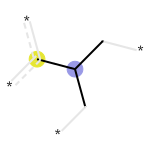

In [10]:
# Which fragment makes a bit ON? or  display the feature that turn a bit ON?
#Here we print one of these fragments
Draw.DrawMorganBit(polymerset.Structure[0], 104, onbits)

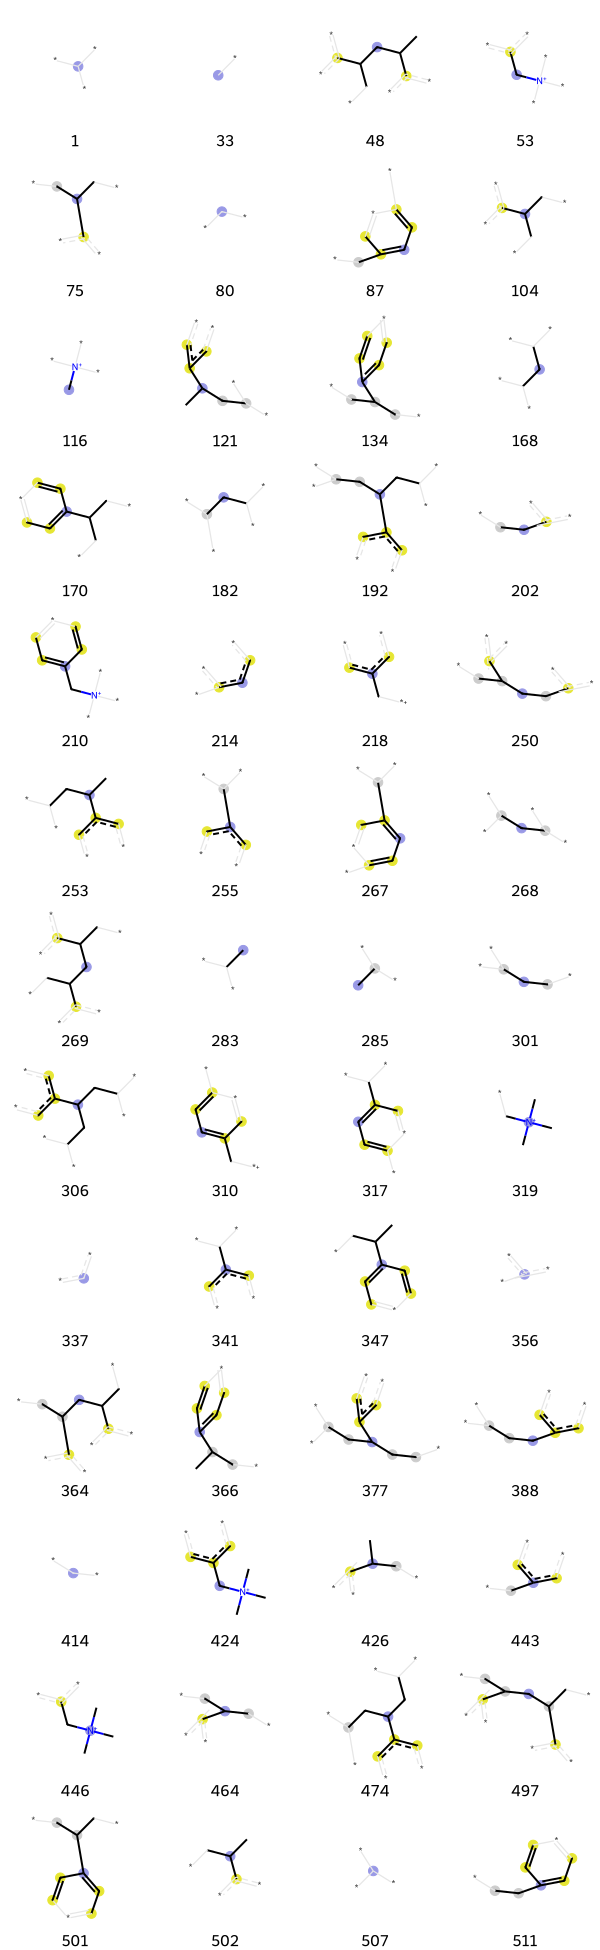

In [12]:
# Render all the fragments or features that are responsible for making ON bits
all_fragments = [(polymerset.Structure[0], x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

In [11]:
#onbits = {}
#mf = AllChem.GetMorganFingerprintAsBitVect(polymerset.Structure[0], 2, nBits=512, bitInfo=onbits)
#print(np.array(mf))

"""""
fps_dict = {}
descr = 'solvation'

for polymer in polymerset:
    if descr == 'solvation':
        fps_dict[polymer] = AllChem.GetMorganFingerprintAsBitVect(polymerset.Structure[polymer], useChirality=True, radius=3, nBits=124)
    else:
        fps_dict[polymer] = AllChem.GetMorganFingerprintAsBitVect(polymerset.Structure[polymer], useChirality=True, radius=3, nBits=128)  

""""

SyntaxError: EOL while scanning string literal (1094781674.py, line 15)

In [12]:
polymerset.head()

,polymers_names,polymers_smiles,Structure
0,ar103,CC1CC2CCC3=CC=C(C=C3)C(CC(CC(C)C4=CC=C1C=C4)C5...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
1,ar204,CC1CC2(C)CC(C)(CC(C)(CC(C)(CC(C)(C)C(=O)OCC[N+...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
2,cr61,CC1CC2CCC3=CC=C(C=C3)C(CC(CCC4=CC=C1C=C4)C5=CC...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
3,nafion,O=[S](=O)([O-])C(F)(F)C(F)(F)OC(F)(C(F)(F)F)C(...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...
4,PVAS_BCE,CC(O)CC(O)CC(O)CC(CC(CC(C)O[S]([O-])(=O)=O)O[S...,<rdkit.Chem.rdchem.Mol object at 0x000001F9C25...


In [16]:
#polymers_names = list(polymerset.keys())
#polymers_names

In [13]:
fps_dict = {}
descr = 'solvation'

for idx, row in polymerset.iterrows():
    polymer_name = row['polymers_names']
    mol = row['Structure']  # Assuming the column name is 'Structure'

    if descr == 'solvation':
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, useChirality=True, radius=3, nBits=124)
    else:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, useChirality=True, radius=3, nBits=128)

    fps_dict[polymer_name] = fp

In [14]:
fp

In [15]:
fps_dict

{'ar103': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568b30>,
 'ar204': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568970>,
 'cr61': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568740>,
 'nafion': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c25689e0>,
 'PVAS_BCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568a50>,
 'PVAS_RCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568ba0>,
 'PSbNMP_BCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568c10>,
 'PSbNMP_RCE': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568e40>,
 'CEM1': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568eb0>,
 'CEM2': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568f20>,
 'CEM3': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2568dd0>,
 'XLAPn4_9p': <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x1f9c2594040>,
 'XLAPn4_45p': <rdkit.DataStructs.cDataStructs.ExplicitBitV

In [17]:
polymers_names = list(polymerset['polymers_names'])
polymers_names

['ar103',
 'ar204',
 'cr61',
 'nafion',
 'PVAS_BCE',
 'PVAS_RCE',
 'PSbNMP_BCE',
 'PSbNMP_RCE',
 'CEM1',
 'CEM2',
 'CEM3',
 'XLAPn4_9p',
 'XLAPn4_45p']

In [18]:
vects_dict = {}
for polymer in polymers_names:
            data_ = np.array(fps_dict[polymer]).reshape(1, -1)
            vects_dict[polymer] = pd.DataFrame(data = data_, columns=[f'mfp_{i}' for i in range(len(data_[0]))])

In [30]:
vects_dict

{'ar103':    mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
 0      1      1      1      0      0      1      1      0      0      1  ...   
 
    mfp_114  mfp_115  mfp_116  mfp_117  mfp_118  mfp_119  mfp_120  mfp_121  \
 0        0        0        1        0        1        1        0        1   
 
    mfp_122  mfp_123  
 0        1        1  
 
 [1 rows x 124 columns],
 'ar204':    mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
 0      1      1      1      0      1      1      1      1      1      0  ...   
 
    mfp_114  mfp_115  mfp_116  mfp_117  mfp_118  mfp_119  mfp_120  mfp_121  \
 0        0        1        1        1        0        1        1        1   
 
    mfp_122  mfp_123  
 0        1        0  
 
 [1 rows x 124 columns],
 'cr61':    mfp_0  mfp_1  mfp_2  mfp_3  mfp_4  mfp_5  mfp_6  mfp_7  mfp_8  mfp_9  ...  \
 0      1      1      1      0      0      1      1      0      0      1  ...   
 
    mfp_114  mfp_115

In [33]:
pd.DataFrame(data = vects_dict, columns=[f'mfp_{i}' for i in range(len(vects_dict[0]))])

KeyError: 0

In [19]:
binary_fps_dict = {polymer_name: np.array(list(fp.ToBitString()), dtype=int) for polymer_name, fp in fps_dict.items()}

# Create a NumPy array from the binary fingerprints
fps_array = np.array(list(binary_fps_dict.values()))

In [20]:
fps_list = list(fps_dict.values())

In [21]:

# Get the number of bits in the fingerprint (124 or 128 based on the description)
num_bits = len(list(fps_dict.values())[0])

# Create an empty NumPy array to hold the fingerprints
fps_array = np.zeros((len(fps_dict), num_bits), dtype=int)

# Populate the NumPy array with the fingerprints
for i, fp in enumerate(fps_dict.values()):
    for j in range(num_bits):
        fps_array[i, j] = fp.GetBit(j)

In [22]:
fps_array

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 1]])

In [23]:
len(fps_array)

13

In [24]:
list(fps_array)

[array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        

In [25]:
pd.DataFrame(data = fps_array, columns=[f'mfp_{i}' for i in range(len(fps_array[0]))])

,mfp_0,mfp_1,mfp_2,mfp_3,mfp_4,mfp_5,mfp_6,mfp_7,mfp_8,mfp_9,...,mfp_114,mfp_115,mfp_116,mfp_117,mfp_118,mfp_119,mfp_120,mfp_121,mfp_122,mfp_123
0,1,1,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,1,1
1,1,1,1,0,1,1,1,1,1,0,...,0,1,1,1,0,1,1,1,1,0
2,1,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,1,1,1
3,1,0,1,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,1,0,1,1,1
7,0,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
8,1,1,1,0,1,1,1,0,0,1,...,1,0,1,1,0,0,1,1,0,0
9,1,1,1,0,0,1,0,1,0,1,...,1,0,1,1,0,0,1,0,1,1
